In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")

In [3]:
sams_tissue_matched=sams[sams['tissue_matched_primary_advanced']=='matched_tissue'].reset_index(drop=True)

# Donut plot TISSUE-MATCHED version

In [4]:
prim_sams_matched=sams_tissue_matched[sams_tissue_matched['source']=='Primary'].reset_index(drop=True)

In [5]:
print('ecDNA fraction: ')
print(str(len(prim_sams_matched[prim_sams_matched['sample_classification']=='ecDNA']))+'/'+ str(len(prim_sams_matched)))
print(round(len(prim_sams_matched[prim_sams_matched['sample_classification']=='ecDNA'])/len(prim_sams_matched),3))
print()

print('ChrAmp fraction: ')
print(str(len(prim_sams_matched[prim_sams_matched['sample_classification']=='ChrAmp']))+'/'+ str(len(prim_sams_matched)))
print(round(len(prim_sams_matched[prim_sams_matched['sample_classification']=='ChrAmp'])/len(prim_sams_matched),3))
print()

print('NoAmp fraction: ')
print(str(len(prim_sams_matched[prim_sams_matched['sample_classification']=='NoAmp']))+'/'+ str(len(prim_sams_matched)))
print(round(len(prim_sams_matched[prim_sams_matched['sample_classification']=='NoAmp'])/len(prim_sams_matched),3))
print()

ecDNA fraction: 
346/1490
0.232

ChrAmp fraction: 
323/1490
0.217

NoAmp fraction: 
821/1490
0.551



In [6]:
adv_sams_matched=sams_tissue_matched[sams_tissue_matched['source']=='Advanced'].reset_index(drop=True)

In [7]:
print('ecDNA fraction: ')
print(str(len(adv_sams_matched[adv_sams_matched['sample_classification']=='ecDNA']))+'/'+ str(len(adv_sams_matched)))
print(round(len(adv_sams_matched[adv_sams_matched['sample_classification']=='ecDNA'])/len(adv_sams_matched),3))
print()

print('ChrAmp fraction: ')
print(str(len(adv_sams_matched[adv_sams_matched['sample_classification']=='ChrAmp']))+'/'+ str(len(adv_sams_matched)))
print(round(len(adv_sams_matched[adv_sams_matched['sample_classification']=='ChrAmp'])/len(adv_sams_matched),3))
print()

print('NoAmp fraction: ')
print(str(len(adv_sams_matched[adv_sams_matched['sample_classification']=='NoAmp']))+'/'+ str(len(adv_sams_matched)))
print(round(len(adv_sams_matched[adv_sams_matched['sample_classification']=='NoAmp'])/len(adv_sams_matched),3))
print()

ecDNA fraction: 
777/2440
0.318

ChrAmp fraction: 
624/2440
0.256

NoAmp fraction: 
1039/2440
0.426



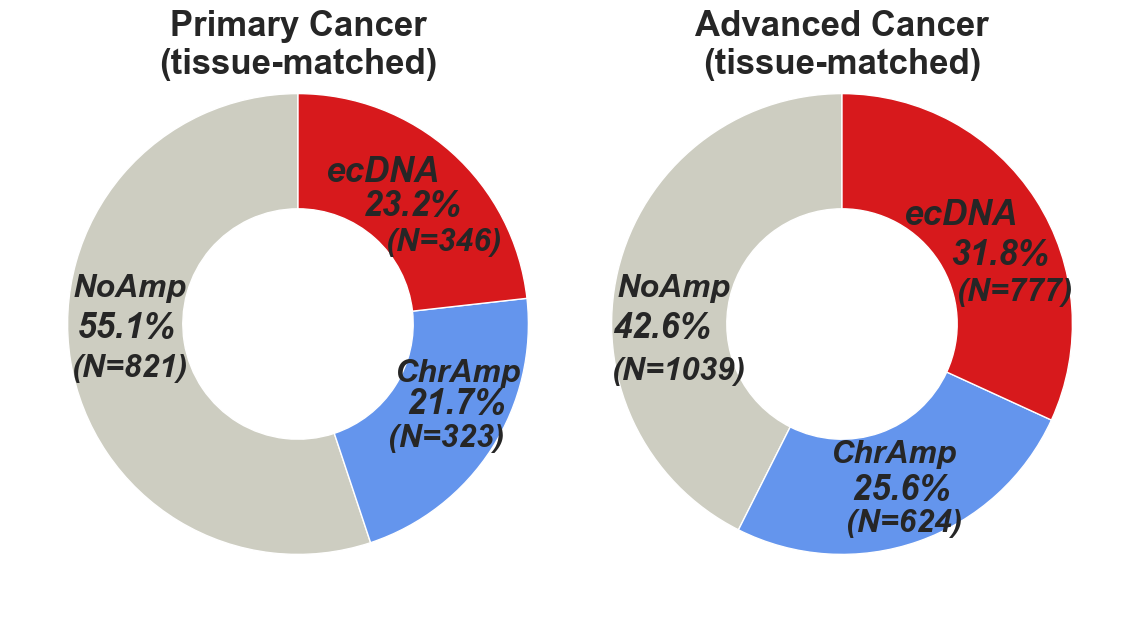

In [8]:
recipe = "NoAmp", "ChrAmp", "ecDNA"
fig = plt.figure()


ax = fig.add_axes([-0.1, .1, 1.2, 1.2], aspect=1)

data = [821,323,346]
ax.pie(data, labels=None, radius=1., wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white','width': 0.5 },startangle = 90,colors=['#CDCDC1','#6495ED','#D7191C'])
ax.set_title('Primary Cancer\n(tissue-matched)'.format(0+1),fontsize = 25,y=0.92,fontweight='bold')

plt.text(0.12,0.62, 'ecDNA', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(0.28,0.47, '23.2%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(0.38,0.32, '(N=346)', fontsize = 23,fontweight='bold',fontstyle='italic')

plt.text(0.42,-0.25, 'ChrAmp', fontsize = 23,fontweight='bold',fontstyle='italic')
plt.text(0.43,-0.39, ' 21.7%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(0.35,-0.53, ' (N=323)', fontsize = 23,fontweight='bold',fontstyle='italic')

plt.text(-0.98,0.12, 'NoAmp', fontsize = 23,fontweight='bold',fontstyle='italic')
plt.text(-0.96,-0.06, '55.1%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(-0.98,-0.23, '(N=821)', fontsize = 23,fontweight='bold',fontstyle='italic')

ax = fig.add_axes([0.75, .1, 1.2,1.2], aspect=1)

data =[1039,624,777]
ax.pie(data, labels=None, radius=1., wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white','width': 0.5 },startangle = 90,colors=['#CDCDC1','#6495ED','#D7191C'])
ax.set_title('Advanced Cancer\n(tissue-matched)'.format(1+1),fontsize = 25,y=0.92,fontweight='bold')

plt.text(0.27,0.43, 'ecDNA', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(0.47,0.26, '31.8%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(0.5,0.1, '(N=777)', fontsize = 23,fontweight='bold',fontstyle='italic')

plt.text(-0.05,-0.60, 'ChrAmp', fontsize = 23,fontweight='bold',fontstyle='italic')
plt.text(-0.0,-0.76, ' 25.6%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(-0.02,-0.90, ' (N=624)', fontsize = 23,fontweight='bold',fontstyle='italic')

plt.text(-0.98,0.12, 'NoAmp', fontsize = 23,fontweight='bold',fontstyle='italic')
plt.text(-1,-0.06, '42.6%', fontsize = 25,fontweight='bold',fontstyle='italic')
plt.text(-1,-0.24, '(N=1039)', fontsize = 23,fontweight='bold',fontstyle='italic')

#plt.savefig("/images/pngs/Fig1B.png", format="png", bbox_inches="tight",dpi=1200)
#plt.savefig("/images/pdfs/Fig1B.pdf", format="pdf", bbox_inches="tight",dpi=1200)

plt.show()